# Lab Evaluation 3 - CB.EN.U4CSE21455 Shreyas Visweshwaran

## Question 1

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np


In [23]:
data = pd.read_csv('data1.csv')
data.dropna(axis=1,inplace=True)

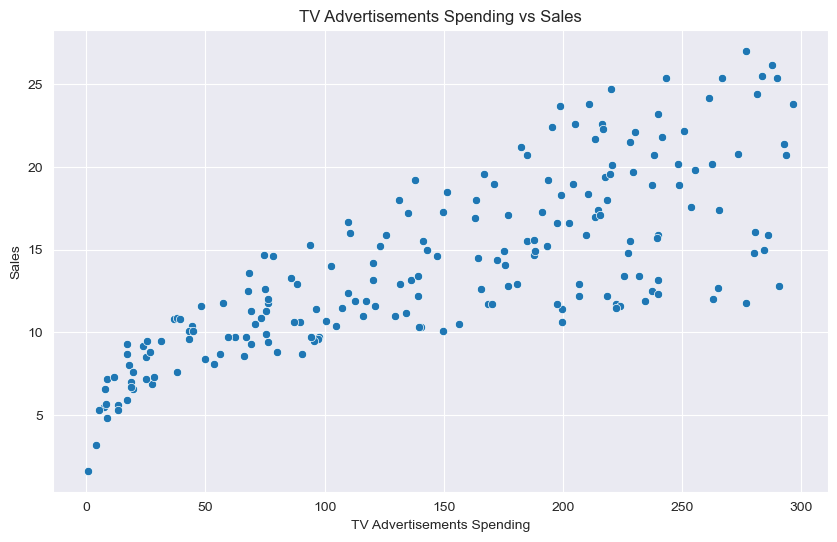

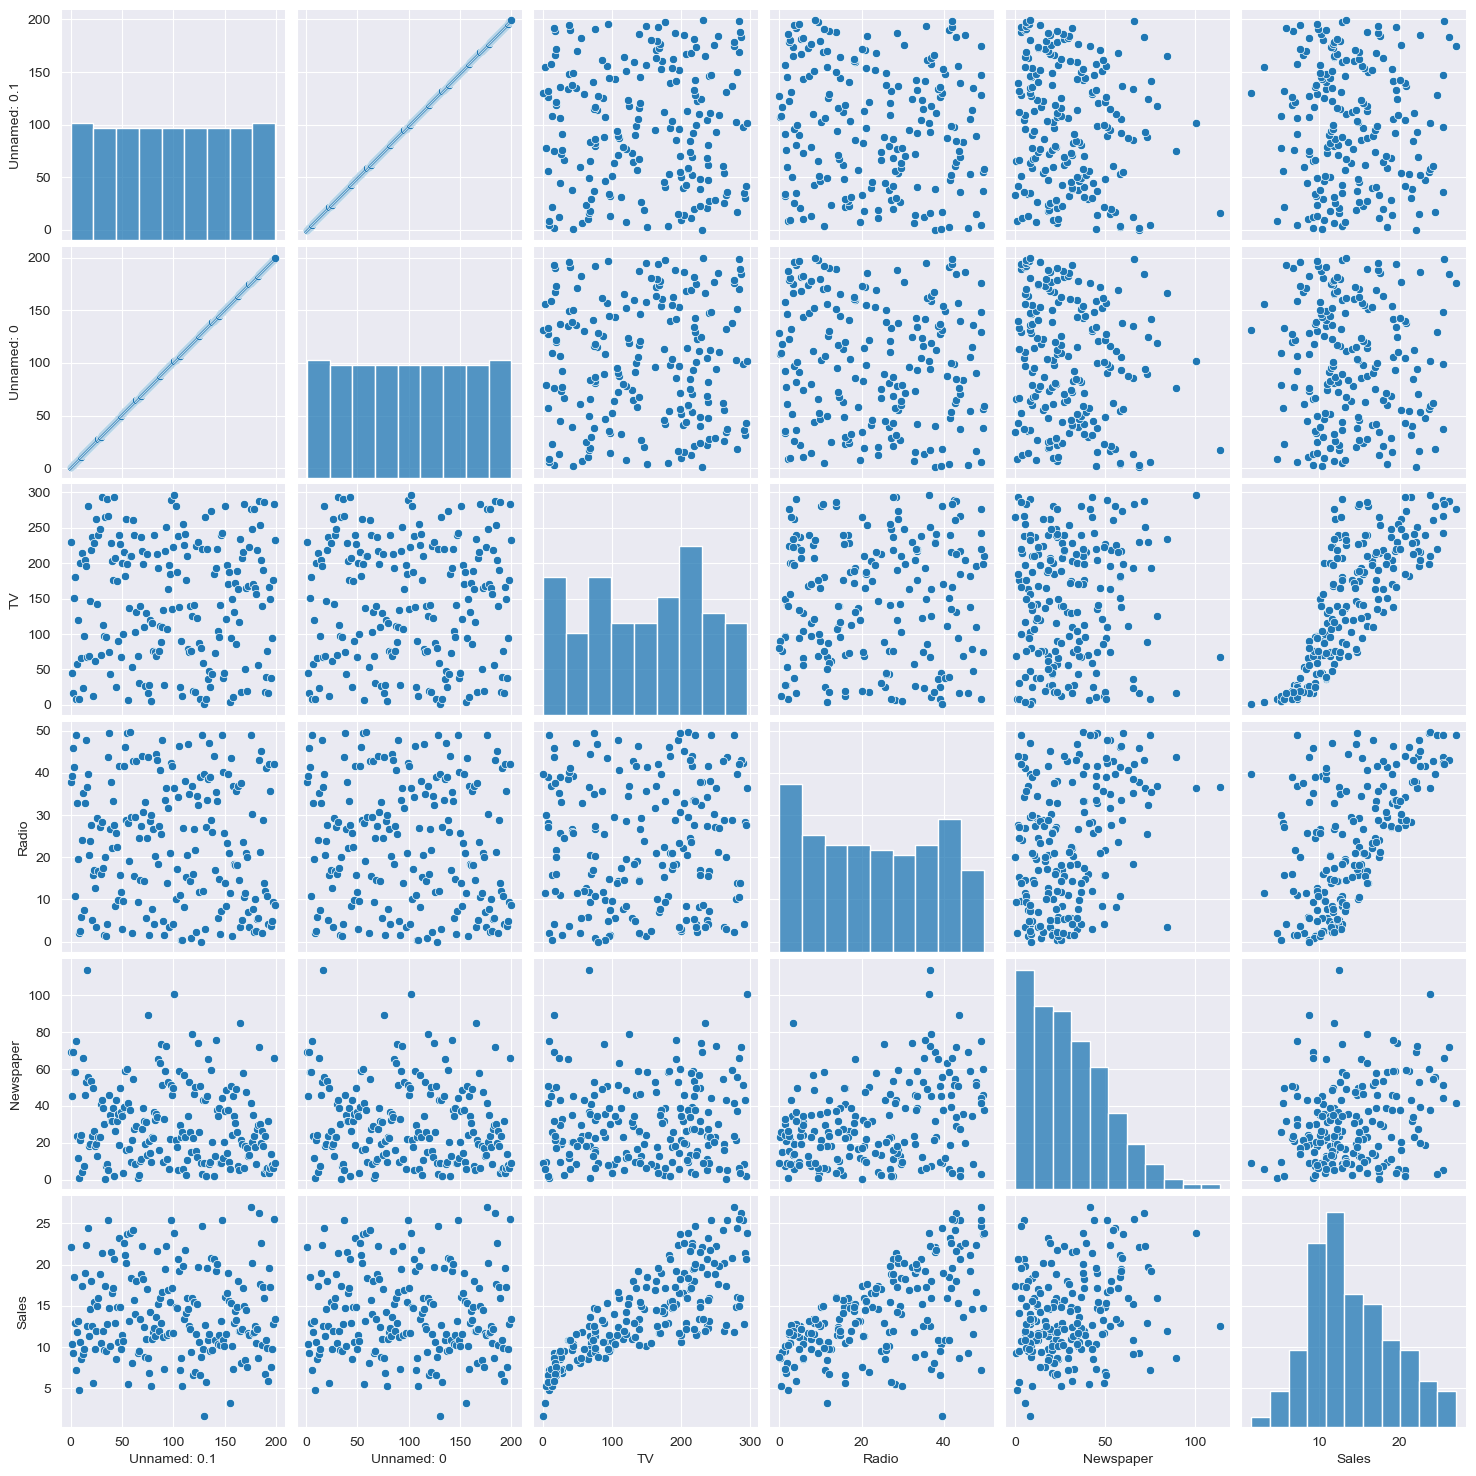

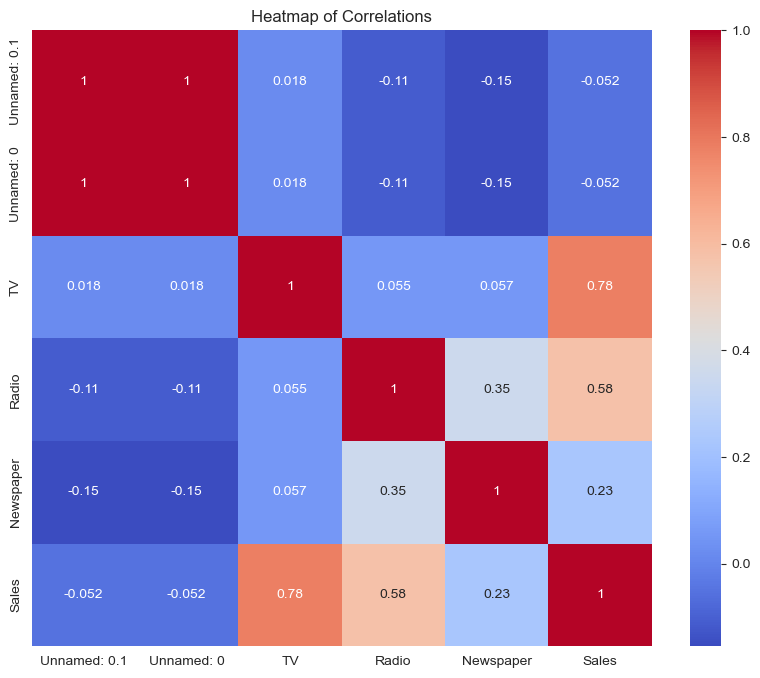

In [25]:

# 1. (a) Scatter plot of money spent on TV advertisements vs Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.title('TV Advertisements Spending vs Sales')
plt.xlabel('TV Advertisements Spending')
plt.ylabel('Sales')
plt.show()

# 1. (b) Pair plots and Heatmap
sns.pairplot(data)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlations')
plt.show()



In [28]:
# 2. Linear Regression model based on TV advertisements vs Sales
X = data[['TV']]
y = data['Sales']
reg_model = LinearRegression().fit(X, y)

In [33]:
# 3. Predict sales based on TV advertisements
tv_range = np.array([[50], [150], [250]])
predicted_sales = reg_model.predict(tv_range)
predicted_sales

C:\Users\shrey\anaconda3\envs\DL\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 9.40942557, 14.16308961, 18.91675366])

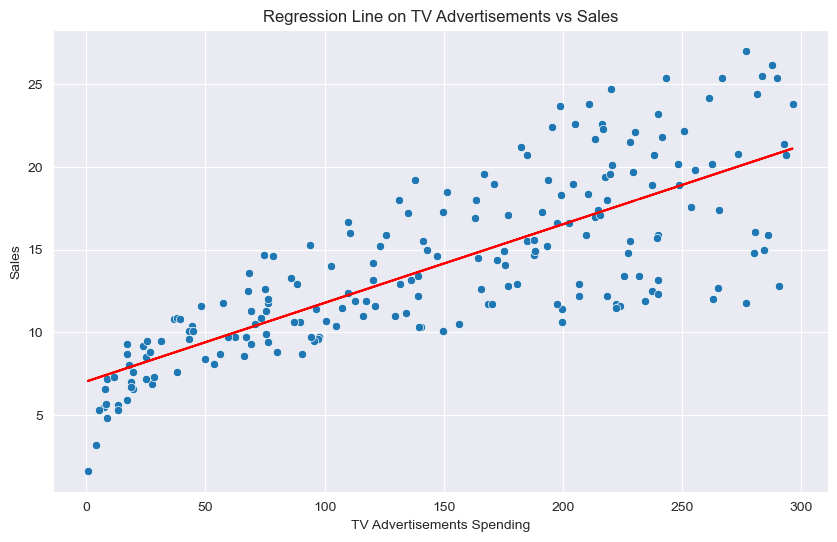

In [30]:
# 4. Regression Line superimposing on the data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.plot(X, reg_model.predict(X), color='red')
plt.title('Regression Line on TV Advertisements vs Sales')
plt.xlabel('TV Advertisements Spending')
plt.ylabel('Sales')
plt.show()

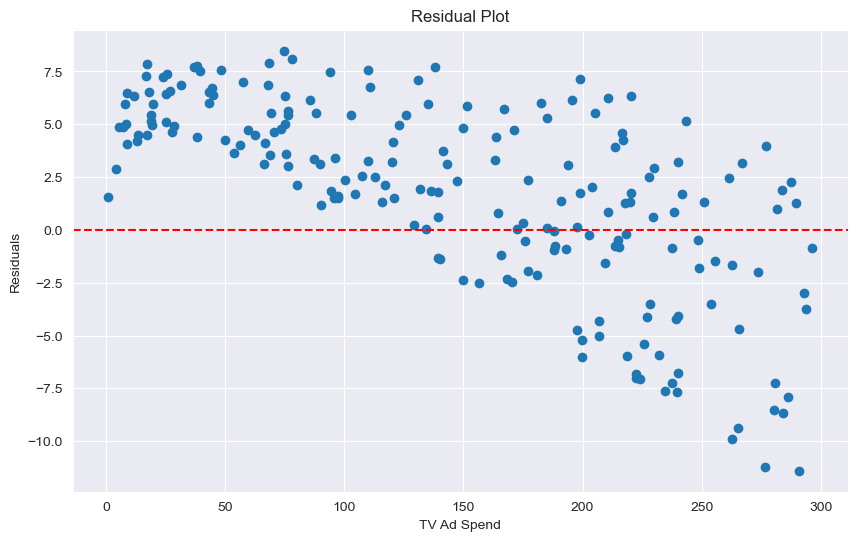

The data exhibits heteroscedasticity.


In [31]:

# statsmodels.api and running an OLS regressor on the data
model = sm.OLS(y, X).fit()

data['Predicted_Sales'] = model.predict(X)

data['Residuals'] = model.resid
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['Residuals'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('TV Ad Spend')
plt.ylabel('Residuals')
plt.show()

if data['Residuals'].var() != np.mean(data['Residuals']):
    print("The data exhibits heteroscedasticity.")
else:
    print("The data does not exhibit heteroscedasticity.")
    


## Question 2

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import  accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [9]:
df = pd.read_csv('data2.csv')

In [10]:
df.isnull().sum()

6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64

In [11]:

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]  

In [12]:
# 1 Splitting the data into ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [13]:
# 2. Rescaling the distribution of values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Function to train and evaluate the KNN classifier model
def train_and_evaluate_knn(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error = np.mean(pred_i != y_test)
    return error

In [15]:
k_range = range(1, 21)

In [16]:
# 3. KNN classifier model

errors = [train_and_evaluate_knn(k) for k in k_range]
optimum_k = k_range[errors.index(min(errors))]
knn_model = KNeighborsClassifier(n_neighbors=optimum_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [17]:

y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


In [32]:
# 4. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[83 14]
 [22 35]]


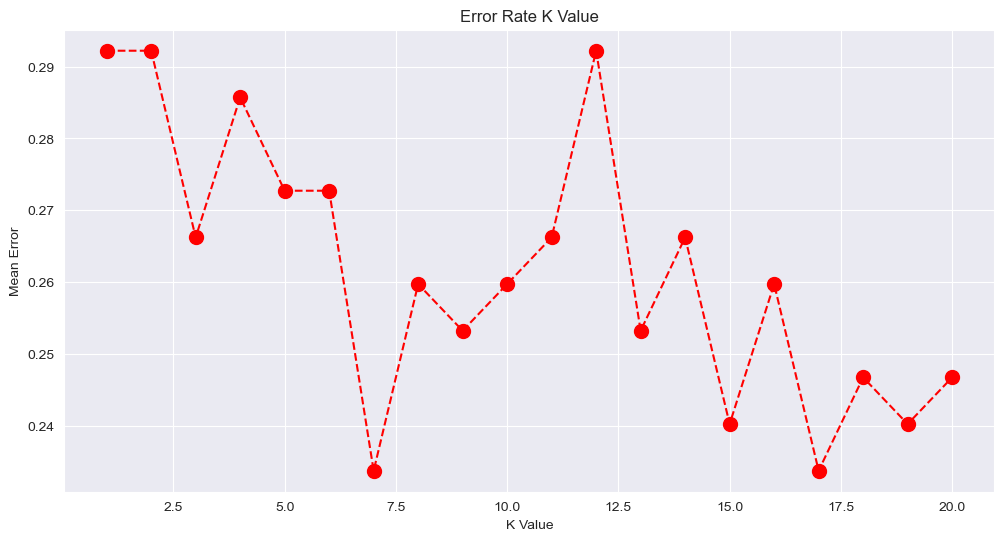

Optimum k value: 7
Confusion Matrix:
 [[83 14]
 [22 35]]


In [18]:
# Plotting the error rate for different k values

y_pred = knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
plt.plot(k_range, errors, color='red', linestyle='dashed', marker='o',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

print("Optimum k value:", optimum_k)
print("Confusion Matrix:\n", conf_matrix)
